# Foot Stiffness Optimization to Minimize Metabolic Cost with Simulated Annealing

This notebook is to log each step performed in analyzing the results of our simulated annealing.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Import data

with open('iteration_data.pkl', 'rb') as f:
    results = pickle.load(f)

print(results)

[{'iteration': 1, 'x': array([13.71, 21.32, 23.3 , 23.3 , 23.3 , 23.3 , 23.3 , 23.3 , 19.19,
       23.3 , 15.99, 10.66, 15.99,  9.14,  6.4 , 21.32, 23.3 , 23.3 ,
       23.3 , 21.32]), 'objective': 35.248688501941714}, {'iteration': 2, 'x': array([ 9.54626595, 21.15210299, 23.13210299, 19.13626596, 19.13626596,
       19.13626596, 23.13210299, 19.13626596, 19.02210299, 23.13210299,
       15.82210299,  6.49626596, 11.82626595,  8.97210299,  6.23210299,
       21.15210299, 19.13626596, 19.13626596, 19.13626596, 21.15210299]), 'objective': 30.581629454398982}, {'iteration': 3, 'x': array([14.75552486, 15.58459755, 17.56459756,  4.44552487, 13.56876053,
        4.44552487,  8.4413619 , 13.56876053,  4.3313619 , 17.56459756,
       21.0313619 , 20.82876052, 17.03552487, 14.1813619 , 11.44136189,
       15.58459755,  4.44552487, 13.56876053, 13.56876053, 15.58459755]), 'objective': 30.411956398862365}, {'iteration': 4, 'x': array([13.16681318,  6.97381154,  8.95381154, 22.75681319, 11.9800

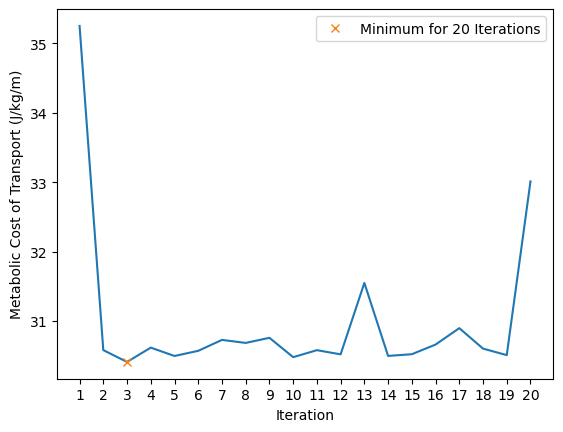

In [17]:
import numpy as np

# Plot simulated annealing results, this was run for a fixed number of iterations so it will not have converged to a value

objective = [float(x['objective']) for x in results]
iterations = [int(x['iteration']) for x in results]
stiffness_arrays = [x['x'] for x in results]
minima = np.argmin(objective)
minimum_cost = objective[minima]
minimum_iter = iterations[minima]
initial_stiffness = stiffness_arrays[0]
optimal_stiffness = stiffness_arrays[minima]


plt.plot(iterations, objective)
plt.plot(minimum_iter, minimum_cost, 'x', label='Minimum for 20 Iterations')
plt.xticks(iterations)
plt.xlabel('Iteration')
plt.ylabel('Metabolic Cost of Transport (J/kg/m)')
plt.legend()
plt.show()

In [20]:
print(f'Stiffness parameters for minimum iteration (Iteration {minimum_iter})')
stiffnesses = [x['x'] for x in results]

print('['+','.join(map(str, stiffnesses[minima]))+']')

Stiffness parameters for minimum iteration (Iteration 3)
[14.755524864112244,15.584597554011735,17.564597558184058,4.445524867688521,13.568760525389107,4.445524867688521,8.441361900483473,13.568760525389107,4.33136190107952,17.564597558184058,21.031361898099288,20.82876052479306,17.035524865304335,14.181361904059754,11.441361894523011,15.584597554011735,4.445524867688521,13.568760525389107,13.568760525389107,15.584597554011735]


In [ ]:
import opensim as osim
from simulated_annealing import run_full_pipeline

x = [14.755524864112244,15.584597554011735,17.564597558184058,4.445524867688521,13.568760525389107,4.445524867688521,8.441361900483473,13.568760525389107,4.33136190107952,17.564597558184058,21.031361898099288,20.82876052479306,17.035524865304335,14.181361904059754,11.441361894523011,15.584597554011735,4.445524867688521,13.568760525389107,13.568760525389107,15.584597554011735]

run_full_pipeline(x)

## Stiffness Change from Initial

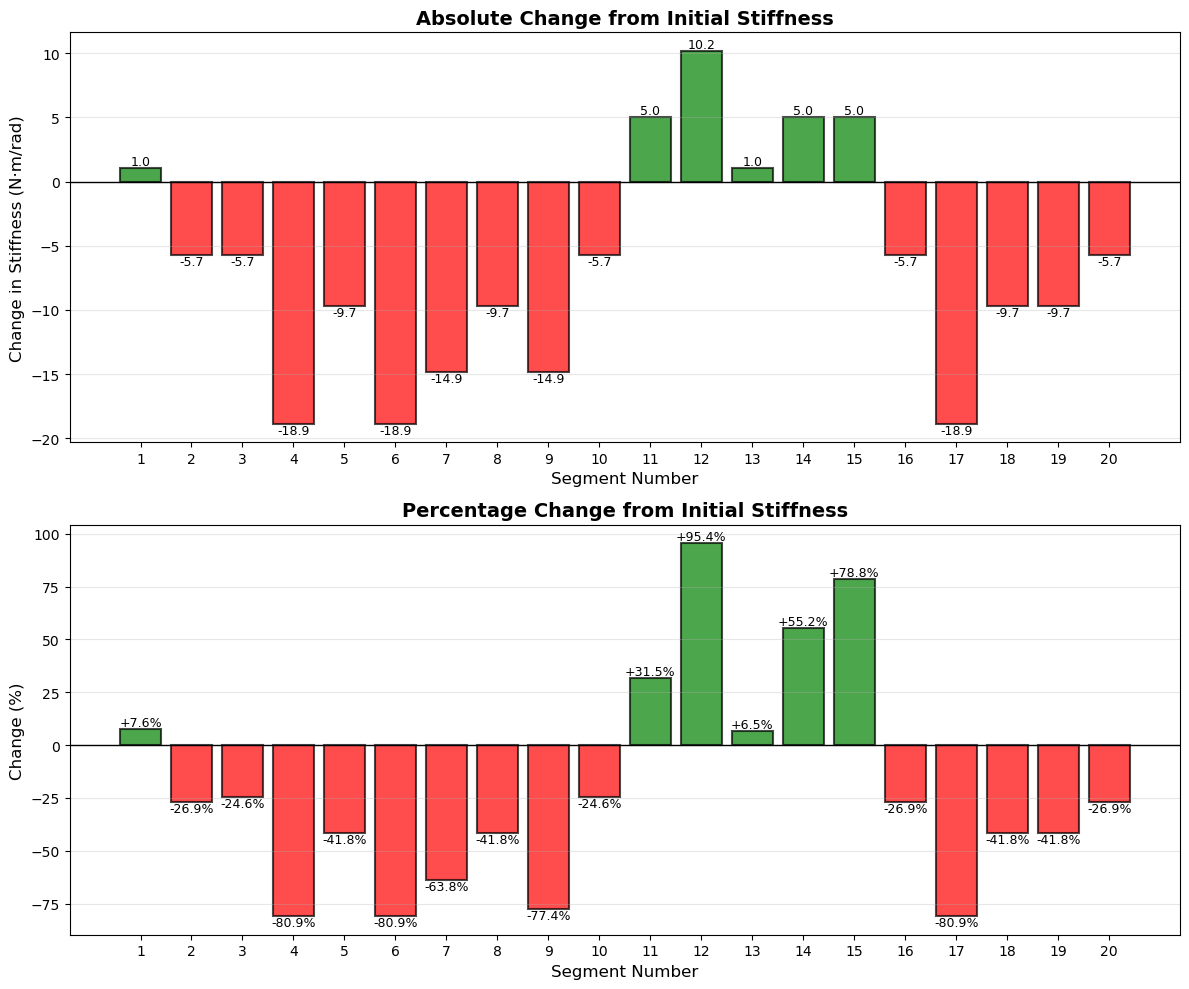


Stiffness Change Summary:
  Segments increased: 6
  Segments decreased: 14
  Segments unchanged: 0
  Mean absolute change: 9.06 N·m/rad
  Mean percentage change: -20.30%


In [19]:
initial_stiffness = stiffness_arrays[0]

# Calculate absolute and percentage changes
absolute_changes = optimal_stiffness - initial_stiffness
percent_changes = ((optimal_stiffness - initial_stiffness) / initial_stiffness) * 100

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

segments = np.arange(1, len(optimal_stiffness) + 1)

# Plot 1: Absolute change in stiffness
colors1 = ['green' if x > 0 else 'red' for x in absolute_changes]
bars1 = ax1.bar(segments, absolute_changes, color=colors1, edgecolor='black', linewidth=1.5, alpha=0.7)
ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.set_xlabel('Segment Number', fontsize=12)
ax1.set_ylabel('Change in Stiffness (N·m/rad)', fontsize=12)
ax1.set_title('Absolute Change from Initial Stiffness', fontsize=14, fontweight='bold')
ax1.set_xticks(segments)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (seg, val) in enumerate(zip(segments, absolute_changes)):
    ax1.text(seg, val, f'{val:.1f}', ha='center', 
             va='bottom' if val > 0 else 'top', fontsize=9)

# Plot 2: Percentage change
colors2 = ['green' if x > 0 else 'red' for x in percent_changes]
bars2 = ax2.bar(segments, percent_changes, color=colors2, edgecolor='black', linewidth=1.5, alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('Segment Number', fontsize=12)
ax2.set_ylabel('Change (%)', fontsize=12)
ax2.set_title('Percentage Change from Initial Stiffness', fontsize=14, fontweight='bold')
ax2.set_xticks(segments)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (seg, val) in enumerate(zip(segments, percent_changes)):
    ax2.text(seg, val, f'{val:+.1f}%', ha='center', 
             va='bottom' if val > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary of changes
print(f"\nStiffness Change Summary:")
print(f"  Segments increased: {np.sum(absolute_changes > 0)}")
print(f"  Segments decreased: {np.sum(absolute_changes < 0)}")
print(f"  Segments unchanged: {np.sum(absolute_changes == 0)}")
print(f"  Mean absolute change: {np.mean(np.abs(absolute_changes)):.2f} N·m/rad")
print(f"  Mean percentage change: {np.mean(percent_changes):.2f}%")

## Summary Statistics

In [18]:
print("="*60)
print("OPTIMIZATION SUMMARY STATISTICS")
print("="*60)
print(f"\nTotal Iterations: {len(results)}")
print(f"\nCost Statistics:")
print(f"  Initial Cost:  {objective[0]:.4f} J/kg/m")
print(f"  Final Cost:    {objective[-1]:.4f} J/kg/m")
print(f"  Minimum Cost:  {minimum_cost:.4f} J/kg/m (iteration {minimum_iter})")
print(f"  Mean Cost:     {np.mean(objective):.4f} J/kg/m")
print(f"  Std Dev:       {np.std(objective):.4f} J/kg/m")
print(f"  Improvement:   {((objective[0] - minimum_cost) / objective[0] * 100):.2f}%")

print(f"\nStiffness Statistics:")
print(f"  Number of segments: {len(optimal_stiffness)}")
print(f"  Mean optimal stiffness: {np.mean(optimal_stiffness):.2f} N·m/rad")
print(f"  Std dev: {np.std(optimal_stiffness):.2f} N·m/rad")
print(f"  Min segment stiffness: {np.min(optimal_stiffness):.2f} N·m/rad")
print(f"  Max segment stiffness: {np.max(optimal_stiffness):.2f} N·m/rad")

# Create summary table
summary_df = pd.DataFrame({
    'Segment': range(1, len(optimal_stiffness) + 1),
    'Initial Stiffness': initial_stiffness,
    'Optimal Stiffness': optimal_stiffness,
    'Change (%)': [((o-i)/i*100) for i, o in zip(initial_stiffness, optimal_stiffness)]
})

print("\nSegment-by-Segment Summary:")
print(summary_df.to_string(index=False))

OPTIMIZATION SUMMARY STATISTICS

Total Iterations: 20

Cost Statistics:
  Initial Cost:  35.2487 J/kg/m
  Final Cost:    33.0102 J/kg/m
  Minimum Cost:  30.4120 J/kg/m (iteration 3)
  Mean Cost:     30.9970 J/kg/m
  Std Dev:       1.1270 J/kg/m
  Improvement:   13.72%

Stiffness Statistics:
  Number of segments: 20
  Mean optimal stiffness: 13.08 N·m/rad
  Std dev: 5.13 N·m/rad
  Min segment stiffness: 4.33 N·m/rad
  Max segment stiffness: 21.03 N·m/rad

Segment-by-Segment Summary:
 Segment  Initial Stiffness  Optimal Stiffness  Change (%)
       1              13.71          14.755525    7.626002
       2              21.32          15.584598  -26.901512
       3              23.30          17.564598  -24.615461
       4              23.30           4.445525  -80.920494
       5              23.30          13.568761  -41.764976
       6              23.30           4.445525  -80.920494
       7              23.30           8.441362  -63.770979
       8              23.30          13.5